In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('lipinski_data_corona.csv')
df.head()

,target_pref_name,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_transformed
0,SARS coronavirus 3C-like proteinase,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,SARS coronavirus 3C-like proteinase,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,SARS coronavirus 3C-like proteinase,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,SARS coronavirus 3C-like proteinase,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,SARS coronavirus 3C-like proteinase,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970


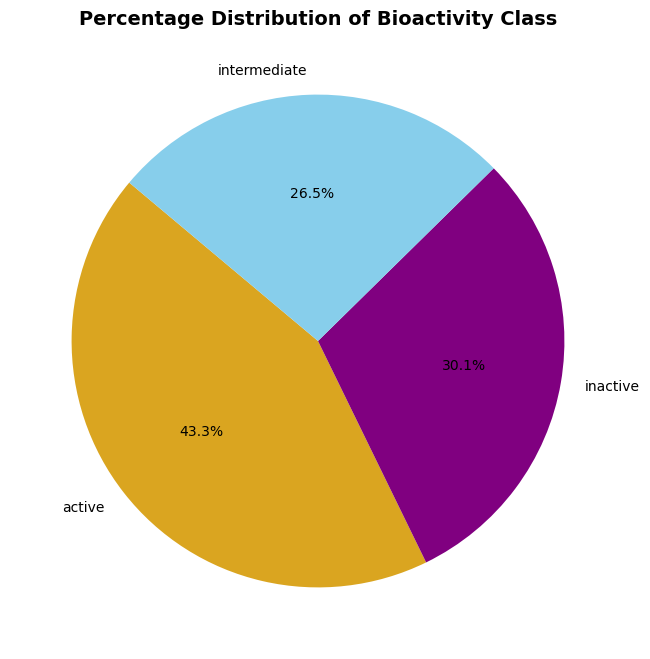

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('lipinski_data_corona.csv')

# Calculate the percentage of each bioactivity class
bioactivity_counts = df['bioactivity_class'].value_counts()
bioactivity_percentages = bioactivity_counts / bioactivity_counts.sum() * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(bioactivity_percentages, labels=bioactivity_percentages.index, autopct='%1.1f%%', colors=["goldenrod", "purple", "skyblue"], startangle=140)
plt.title('Percentage Distribution of Bioactivity Class', fontsize=14, fontweight='bold')
plt.show()

In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('lipinski_data_corona.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


                      target_pref_name molecule_chembl_id  \
0  SARS coronavirus 3C-like proteinase       CHEMBL187579   
1  SARS coronavirus 3C-like proteinase       CHEMBL188487   
2  SARS coronavirus 3C-like proteinase       CHEMBL185698   
3  SARS coronavirus 3C-like proteinase       CHEMBL426082   
4  SARS coronavirus 3C-like proteinase       CHEMBL187717   

                                  canonical_smiles bioactivity_class       MW  \
0           Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21      intermediate  281.271   
1           O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21      intermediate  415.589   
2          O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21          inactive  421.190   
3              O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21          inactive  293.347   
4  O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]      intermediate  338.344   

      LogP  NumHDonors  NumHAcceptors  standard_value_transformed  
0  1.89262         0.0            5.0                    5.142668  
1  3.81320

In [5]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem

# Load the CSV file
input_csv = 'lipinski_data_corona.csv'
data = pd.read_csv(input_csv)

# Ensure the file contains the required column
if 'canonical_smiles' not in data.columns:
    raise ValueError("The CSV file must contain a 'canonical_smiles' column.")

# Convert SMILES strings to RDKit molecule objects
data['molecule'] = data['canonical_smiles'].apply(Chem.MolFromSmiles)

# Filter out invalid molecules
data = data[data['molecule'].notnull()]

# Function to calculate molecular descriptors
def calculate_descriptors(molecule):
    # Calculate molecular weight, LogP, etc.
    descriptors = {
        'MolWt': Descriptors.MolWt(molecule),
        'LogP': Descriptors.MolLogP(molecule),
        'NumHDonors': Descriptors.NumHDonors(molecule),
        'NumHAcceptors': Descriptors.NumHAcceptors(molecule)
    }
    return pd.Series(descriptors)

# Apply the descriptor calculation
descriptors_df = data['molecule'].apply(calculate_descriptors)

# Calculate Morgan Fingerprints
data['fingerprints'] = data['molecule'].apply(
    lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024)
)

# Combine the original data with the descriptors
result = pd.concat([data, descriptors_df], axis=1)

# Save the processed data to a new CSV file
output_csv = 'processed_data.csv'
result.to_csv(output_csv, index=False)

print(f"Processed data has been saved to '{output_csv}'.")

Processed data has been saved to 'processed_data.csv'.


In [6]:
prp=pd.read_csv('processed_data.csv')
prp.head()

,target_pref_name,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_transformed,molecule,fingerprints,MolWt,LogP.1,NumHDonors.1,NumHAcceptors.1
0,SARS coronavirus 3C-like proteinase,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668,<rdkit.Chem.rdchem.Mol object at 0x000001AD043...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,281.271,1.89262,0.0,5.0
1,SARS coronavirus 3C-like proteinase,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872,<rdkit.Chem.rdchem.Mol object at 0x000001AD043...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,415.589,3.81320,0.0,2.0
2,SARS coronavirus 3C-like proteinase,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666,<rdkit.Chem.rdchem.Mol object at 0x000001AD043...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,421.190,2.66050,0.0,4.0
3,SARS coronavirus 3C-like proteinase,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397,<rdkit.Chem.rdchem.Mol object at 0x000001AD043...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,293.347,3.63080,0.0,3.0
4,SARS coronavirus 3C-like proteinase,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970,<rdkit.Chem.rdchem.Mol object at 0x000001AD043...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,338.344,3.53900,0.0,5.0


In [7]:
prp.head()

,target_pref_name,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_transformed,molecule,fingerprints,MolWt,LogP.1,NumHDonors.1,NumHAcceptors.1
0,SARS coronavirus 3C-like proteinase,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668,<rdkit.Chem.rdchem.Mol object at 0x000001AD043...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,281.271,1.89262,0.0,5.0
1,SARS coronavirus 3C-like proteinase,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872,<rdkit.Chem.rdchem.Mol object at 0x000001AD043...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,415.589,3.81320,0.0,2.0
2,SARS coronavirus 3C-like proteinase,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666,<rdkit.Chem.rdchem.Mol object at 0x000001AD043...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,421.190,2.66050,0.0,4.0
3,SARS coronavirus 3C-like proteinase,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397,<rdkit.Chem.rdchem.Mol object at 0x000001AD043...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,293.347,3.63080,0.0,3.0
4,SARS coronavirus 3C-like proteinase,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970,<rdkit.Chem.rdchem.Mol object at 0x000001AD043...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,338.344,3.53900,0.0,5.0


In [12]:
prp.shape 

(1802, 15)

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from rdkit import Chem
from rdkit.Chem import AllChem
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset
input_csv = 'processed_data.csv'
data = pd.read_csv(input_csv)

# Drop unnecessary columns
data = data.drop(columns=['molecule_chembl_id'], errors='ignore')

# Encode target variable
class_mapping = {'inactive': 0, 'intermediate': 1, 'active': 2}
data['bioactivity_class'] = data['bioactivity_class'].map(class_mapping)

# Convert SMILES strings into Morgan fingerprints
def smiles_to_morgan(smiles, radius=2, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return list(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits))

# Generate Morgan fingerprints
data['fingerprints'] = data['canonical_smiles'].apply(smiles_to_morgan)

# Remove invalid SMILES rows
data = data[data['fingerprints'].notna()]

# Expand Morgan fingerprints into separate columns
fingerprints_df = pd.DataFrame(data['fingerprints'].tolist(), index=data.index)

# Combine fingerprints with target variable
X = fingerprints_df
y = data['bioactivity_class']

# Step 1: Remove redundant features using VarianceThreshold
variance_threshold = VarianceThreshold(threshold=0.01)  # Removes features with low variance
X_filtered = variance_threshold.fit_transform(X)

# Step 2: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_filtered, y)

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

# Step 4: Train Random Forest and XGBoost classifiers
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced'
)
xgboost = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=1,
    random_state=42
)

# Train classifiers
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Step 5: Evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr')

    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['inactive', 'intermediate', 'active']))
    print("-" * 40)

evaluate_model(random_forest, X_test, y_test, "Random Forest")
evaluate_model(xgboost, X_test, y_test, "XGBoost")

# Step 6: Ensemble using Stacking
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', random_forest),
        ('xgb', xgboost)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)
stacking_clf.fit(X_train, y_train)

# Evaluate stacking classifier
evaluate_model(stacking_clf, X_test, y_test, "Stacking Classifier")

# Step 7: Cross-validation for stability
print("\nCross-Validation Metrics:")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv = cross_val_score(random_forest, X_balanced, y_balanced, cv=skf, scoring='f1_weighted')
xgb_cv = cross_val_score(xgboost, X_balanced, y_balanced, cv=skf, scoring='f1_weighted')
stack_cv = cross_val_score(stacking_clf, X_balanced, y_balanced, cv=skf, scoring='f1_weighted')

print(f"Random Forest CV F1 Score: {rf_cv.mean():.4f} ± {rf_cv.std():.4f}")
print(f"XGBoost CV F1 Score: {xgb_cv.mean():.4f} ± {xgb_cv.std():.4f}")
print(f"Stacking Classifier CV F1 Score: {stack_cv.mean():.4f} ± {stack_cv.std():.4f}")

# Save trained models for deployment
import joblib
joblib.dump(random_forest, 'random_forest_model.pkl')
joblib.dump(xgboost, 'xgboost_model.pkl')
joblib.dump(stacking_clf, 'stacking_model.pkl')
joblib.dump(variance_threshold, 'variance_threshold.pkl')

print("All models and preprocessing steps are saved.")


C:\Users\MK\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:48:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)



--- Random Forest ---
Accuracy: 0.7122
F1 Score: 0.7139
ROC-AUC: 0.7841

Classification Report:
              precision    recall  f1-score   support

    inactive       0.70      0.75      0.73       156
intermediate       0.62      0.65      0.64       156
      active       0.83      0.73      0.78       157

    accuracy                           0.71       469
   macro avg       0.72      0.71      0.71       469
weighted avg       0.72      0.71      0.71       469

----------------------------------------

--- XGBoost ---
Accuracy: 0.7655
F1 Score: 0.7663
ROC-AUC: 0.8241

Classification Report:
              precision    recall  f1-score   support

    inactive       0.74      0.76      0.75       156
intermediate       0.70      0.71      0.70       156
      active       0.87      0.83      0.85       157

    accuracy                           0.77       469
   macro avg       0.77      0.77      0.77       469
weighted avg       0.77      0.77      0.77       469

---------

C:\Users\MK\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:48:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\MK\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:48:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\MK\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:48:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning


--- Stacking Classifier ---
Accuracy: 0.7612
F1 Score: 0.7623
ROC-AUC: 0.8209

Classification Report:
              precision    recall  f1-score   support

    inactive       0.74      0.77      0.75       156
intermediate       0.69      0.71      0.70       156
      active       0.86      0.81      0.84       157

    accuracy                           0.76       469
   macro avg       0.76      0.76      0.76       469
weighted avg       0.76      0.76      0.76       469

----------------------------------------

Cross-Validation Metrics:


C:\Users\MK\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:49:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\MK\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:49:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\MK\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:49:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning

Random Forest CV F1 Score: 0.7050 ± 0.0085
XGBoost CV F1 Score: 0.7653 ± 0.0146
Stacking Classifier CV F1 Score: 0.7461 ± 0.0143
All models and preprocessing steps are saved.
